In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

import random as r

from helper import flip_image
from helper import rotate_image
from helper import random_crop_image
from helper import adjust_brightness_image
from helper import adjust_contrast_image

2023-09-22 20:59:40.239019: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-22 20:59:40.282201: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-22 20:59:40.282760: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-22 20:59:41.060914: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train/255
x_test = x_test/255

In [3]:
model = tf.keras.models.Sequential([
    layers.Input(x_train.shape[1:]),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [4]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [6]:
x_train_3 = tf.expand_dims(x_train, axis=1)
train = tf.data.Dataset.from_tensor_slices((x_train_3, y_train))

a_train = train.map(random_crop_image)
a_train = a_train.map(adjust_brightness_image)
a_train = a_train.map(adjust_contrast_image)
a_train = a_train.shuffle(len(x_train)).batch(32)

# Convert the train dataset back to (x_train, y_train) format
converted_x_train = []
converted_y_train = []

for x, y in a_train.as_numpy_iterator():
    converted_x_train.append(x)
    converted_y_train.append(y)

x_train = np.array(converted_x_train)
y_train = np.array(converted_y_train)
x_train = tf.reshape(x_train, shape=(60000, 28, 28))
y_train = tf.reshape(y_train, shape=(60000,))


2023-09-22 20:59:42.496046: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 376320000 exceeds 10% of free system memory.
2023-09-22 20:59:42.800998: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 376320000 exceeds 10% of free system memory.
2023-09-22 20:59:45.262720: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 376320000 exceeds 10% of free system memory.


In [7]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3231 - accuracy: 0.9046 - val_loss: 0.1680 - val_accuracy: 0.9506
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1352 - accuracy: 0.9593 - val_loss: 0.1368 - val_accuracy: 0.9598
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0936 - accuracy: 0.9707 - val_loss: 0.1389 - val_accuracy: 0.9574
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0699 - accuracy: 0.9774 - val_loss: 0.0972 - val_accuracy: 0.9701
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0552 - accuracy: 0.9826 - val_loss: 0.1069 - val_accuracy: 0.9700
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0452 - accuracy: 0.9856 - val_loss: 0.0971 - val_accuracy: 0.9712
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0343 - accuracy: 0.9886 - val_loss: 0.1171 - val_accuracy: 0.9661
Epoch 

In [8]:
probabilities = model.predict(x_test)
predictions = np.argmax(probabilities, axis=1)

313/313 [==============================] - 0s 913us/step


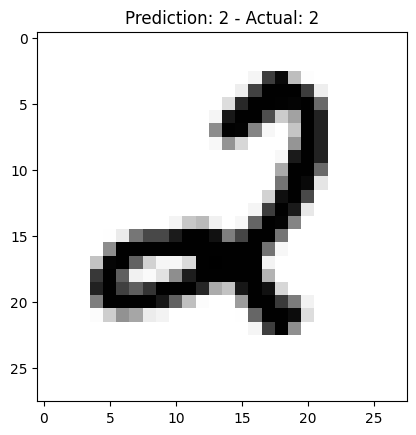

In [51]:
index = r.randint(0, len(y_test))

plt.imshow(x_test[index], cmap="Greys")
plt.title(f"Prediction: {predictions[index]} - Actual: {y_test[index]}")
plt.show()